# Classification problem with tf.keras

This problem is inspired by the XOR problem (y = 1 when x1 * x2 > 0, y = 0 when x1 * x2 < 0). New problem (as represented by the figure below): variables x1 and x2 are uniformly distributed in the square area [-6,6] x [-6,6] and response variable y = 1 in region $(x_1-3)^2 + (x_2-3)^2 < 4$ and $(x_1+3)^2 + (x_2+3)^2 < 4$ and y = 0 elsewhere

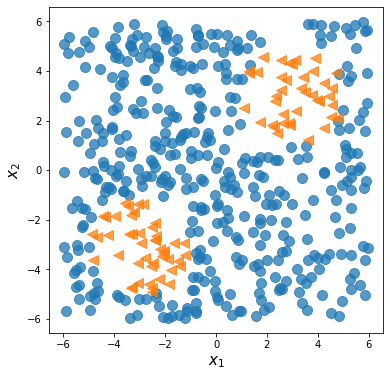

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(2)
x = np.random.uniform(low=-6, high=6, size=(500,2))
y = np.zeros(len(x))
y[(x[:,0]-3)**2 + (x[:,1]-3)**2 < 4] = 1
y[(x[:,0]+3)**2 + (x[:,1]+3)**2 < 4] = 1
x_train = x[:300,:]
y_train = y[:300]
x_valid = x[300:, :]
y_valid = y[300:]
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0,0], x[y==0,1], 'o',alpha=0.75, markersize=10)
plt.plot(x[y==1,0], x[y==1,1], '<',alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$x_2$',size=15)
plt.show()

In [29]:
# single layer NN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,),
                               activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                epochs=200, batch_size=2, verbose=0)

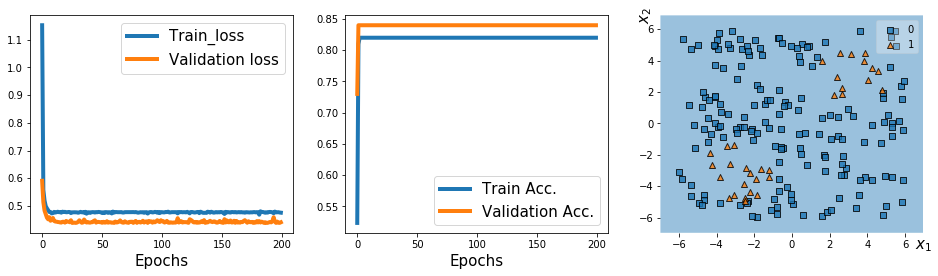

In [31]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [32]:
# single layer NN did not do a good job classifying the data

In [33]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4,
                               input_shape=(2,),
                               activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                validation_data=(x_valid, y_valid),
                epochs=200, batch_size=2, verbose=0)

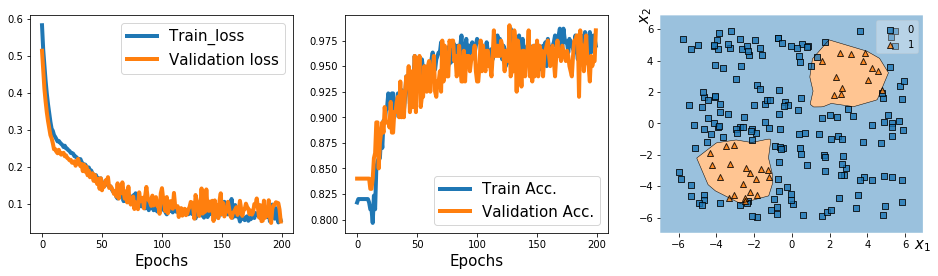

In [35]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [36]:
# multilayer neural network classfied the two classes quite well!

# Regression problem with tf.keras

The dataset we are using is the [*Titanic*](https://www.kaggle.com/c/titanic) dataset from kaggle.

In [441]:
import pandas as pd
df = pd.read_csv('/Users/tz/Desktop/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [442]:
# 'Survived' is the target column we want to predict.
# Predictive variables are: Pclass (ordinal), sex (categorical), age (continuous), SibSp (continuous)
# parch (continuous), fare (continuous), embarked (categorical)
# All the other variables are not used

In [443]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)

In [444]:
X = df.drop('Survived',1)
y = df['Survived']

In [445]:
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=1)

In [446]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass        0
Sex           0
Age         144
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         33
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [447]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # median, most_frequent
imr = imr.fit(X_train['Age'].values.reshape(-1,1))
X_train = X_train.assign(Age=imr.transform(X_train['Age'].values.reshape(-1,1)))
X_test = X_test.assign(Age=imr.transform(X_test['Age'].values.reshape(-1,1)))

In [448]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [449]:
idx1 = X_train.index[X_train['Embarked'].isnull()]
idx2 = X_test.index[X_test['Embarked'].isnull()]
# X_train.drop(idx1)

In [450]:
X_train = X_train.drop(idx1)
X_test = X_test.drop(idx2)
y_train = y_train.drop(idx1)
y_test = y_test.drop(idx2)

In [451]:
X_train = X_train.assign(Pclass_ge3 = X_train['Pclass'].apply(lambda x: 1 if x >= 3 else 0)) 
X_train = X_train.assign(Pclass_ge2 = X_train['Pclass'].apply(lambda x: 1 if x >= 2 else 0)) 
X_test = X_test.assign(Pclass_ge3 = X_test['Pclass'].apply(lambda x: 1 if x >= 3 else 0)) 
X_test = X_test.assign(Pclass_ge2 = X_test['Pclass'].apply(lambda x: 1 if x >= 2 else 0)) 
del X_train['Pclass']
del X_test['Pclass']

In [452]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_ge3,Pclass_ge2
301,male,30.166232,2,0,23.2500,Q,1,1
309,female,30.000000,0,0,56.9292,C,0,0
516,female,34.000000,0,0,10.5000,S,0,1
120,male,21.000000,2,0,73.5000,S,0,1
570,male,62.000000,0,0,10.5000,S,0,1


In [467]:
from sklearn.preprocessing import OneHotEncoder
embarked_ohe = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(embarked_ohe.fit_transform((X_train[['Embarked']])).toarray())
enc_
# X[:,0].reshape(-1,1)
# color_ohe.fit_transform(X[:,0].reshape(-1,1))


,0,1
0,1.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
705,0.0,1.0
706,1.0,0.0
707,0.0,1.0
708,0.0,1.0


In [330]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0,5]),
    ('nothing', 'passthrough', [1,2,3,4,6,7])
])
X_train = c_transf.fit_transform(X_train)#.astype(float)
X_test = c_transf.transform(X_test)#.astype(float)

In [331]:
X_train.shape

(710, 11)

In [333]:
X_test

array([[ 1.    ,  0.    ,  0.    , ..., 25.9292,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ...,  7.8958,  1.    ,  1.    ],
       [ 1.    ,  0.    ,  0.    , ..., 10.5   ,  0.    ,  1.    ],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  7.7333,  1.    ,  1.    ],
       [ 0.    ,  1.    ,  0.    , ...,  7.7333,  1.    ,  1.    ],
       [ 1.    ,  0.    ,  1.    , ..., 19.2583,  1.    ,  1.    ]])

In [312]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4,
                               input_shape=(11,),
                               activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 4)                 48        
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [288]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=200, batch_size=10, verbose=0)

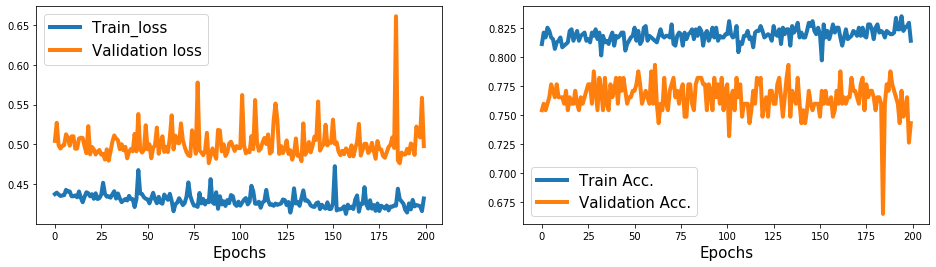

In [289]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,2,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
# ax = fig.add_subplot(1,3,3)
# plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
#                       clf=model)
# ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
# ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Regression problem with tf.Estimator

In [290]:
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('Survival')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_x), train_y))
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [292]:
ds = train_input_fn(pd.concat([X_train, pd.DataFrame(y_train)], axis=1))
batch = next(iter(ds))
print('Keys:', batch[0].keys())

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
pd.concat([X_train, pd.DataFrame(y_train)

In [295]:
pd.DataFrame(np.array(y_train))

,0
0,1
1,1
2,1
3,0
4,1
...,...
705,0
706,0
707,0
708,0


In [296]:
np.array(y_train)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [314]:
type(y_train)

pandas.core.series.Series

In [315]:
pd.merge(X_train, y_train)

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [316]:
X_train

array([[ 0.    ,  1.    ,  0.    , ..., 23.25  ,  1.    ,  1.    ],
       [ 1.    ,  0.    ,  1.    , ..., 56.9292,  0.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 10.5   ,  0.    ,  1.    ],
       ...,
       [ 0.    ,  1.    ,  0.    , ..., 73.5   ,  0.    ,  1.    ],
       [ 1.    ,  0.    ,  0.    , ...,  7.55  ,  1.    ,  1.    ],
       [ 0.    ,  1.    ,  0.    , ...,  8.05  ,  1.    ,  1.    ]])